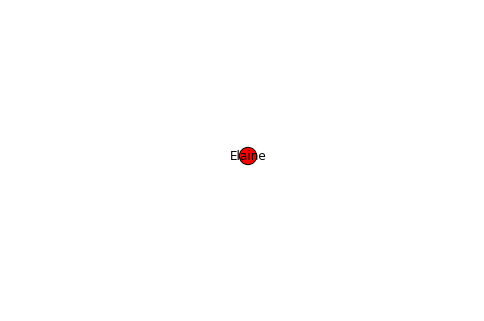

In [2]:
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
%matplotlib inline
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node('Elaine')
# Draw the graph
nx.draw(graph, with_labels=True)

In [114]:
import glob
import io, codecs,json

past=[]
DIR2='D:\\TCC\\Data\\mentions\\'
DIR1='C:\\Users\\Elaine\\Desktop\\TCC\\all timeline\\'
for _, _, arquivos1 in os.walk(DIR2): arquivos1
    
for file2 in glob.glob(DIR1+"*.txt"):
    #for file2 in glob.glob(DIR2+"*.txt"):
        with io.open(file2,'r',encoding="utf-8") as f:#, codecs.open(file2, 'r', encoding='utf-8') as fi:
            print file2
            file_users = f.readlines()
            #file_mentions = fi.readlines()
            for i in xrange(len(file_users)):
                #print i
                tweet_users = json.loads(file_users[i])
                user_name = tweet_users['user']['screen_name']
                #print 'user: ', user_name
                #print file2.replace('.txt.txt', '')
                for a in arquivos1:
                    #print 'tes'
                    #print a.replace('.txt', '')
                    if a.replace('.txt', '') in tweet_users['text']:
                        #print 'a: ', a
                        #print tweet_users['text']
                        mentions_file = codecs.open(DIR2+a,'r', encoding='utf-8')
                        read = mentions_file.readlines()
                        for k in xrange(len(read)):
                            try:
                                ttt = json.loads(read[k])
                            except:
                                continue
                            if (user_name in ttt['text']) and (ttt['user']['screen_name'] not in set(past)):
                                graph.add_edge(user_name,ttt['user']['screen_name'])        
                                graph.add_edge(ttt['user']['screen_name'],user_name)
                                print ttt['user']['screen_name'],user_name
                                past.append(ttt['user']['screen_name'])
                                break
                            
                
                        
                        
                        #edge1 = (user_name,file2.replace('.txt.txt', ''))
                    #print edge1
                    
        
    
"""for j in xrange(len(file_mentions)):
    tweet_mentions = json.loads(file_mentions)
    if user_name in tweet_mentions['text']:
        user_mentions = tweet_mentions['screen_name']
        break

    if user_mentions in tweet_users['text']:                 
        graph.add_edge(user_name,user_mentions)        
        graph.add_edge(user_mentions,user_name) """ 

C:\Users\Elaine\Desktop\TCC\all timeline\0686966667ff496.txt.txt
Dellacorte1311 0686966667ff496
marisascruz 0686966667ff496
SakaSakamori 0686966667ff496
taniaoliveira_ 0686966667ff496
Ezequiasns 0686966667ff496
ottoni_3101 0686966667ff496
louisefabri 0686966667ff496
Lindasod 0686966667ff496
aeciofaraujo 0686966667ff496
TO_DE_OLHO 0686966667ff496
paulacamara_ 0686966667ff496
StreetTed 0686966667ff496
nascimentoctba 0686966667ff496
mitags 0686966667ff496
motta1302 0686966667ff496
MaysaBentes 0686966667ff496
AnaClauLopes 0686966667ff496
DanDan_Dorigon 0686966667ff496
soraiazc 0686966667ff496
gorettem 0686966667ff496
fegomes74 0686966667ff496
Debbiewerneck 0686966667ff496
genaromagno 0686966667ff496
fofocasonline 0686966667ff496
Oconservador18 0686966667ff496
thiagovanzeler 0686966667ff496
Amel43 0686966667ff496
iabsilva2 0686966667ff496
CoradoCamara 0686966667ff496
PrisciIlIa 0686966667ff496
eguarda 0686966667ff496
POTUS_BR 0686966667ff496
nilzevictor 0686966667ff496
cabral1956 0686966667

KeyboardInterrupt: 

In [29]:
import os
test =[]
test2 = []
for _, _, arquivo1 in os.walk(DIR1): arquivo1
for _, _, arquivo2 in os.walk(DIR2): arquivo2
    

In [56]:
import re
arquivo22=[]
for t in arquivo2:
    t=t.replace('.txt.txt', '')
    arquivo22.append(t)
    
    

In [110]:
'Dellacorte1311' not in set(past)
print past

[u'Dellacorte1311', u'Dellacorte1311', u'marisascruz', u'Dellacorte1311', u'Dellacorte1311', u'marisascruz', u'marisascruz', u'marisascruz', u'SakaSakamori']


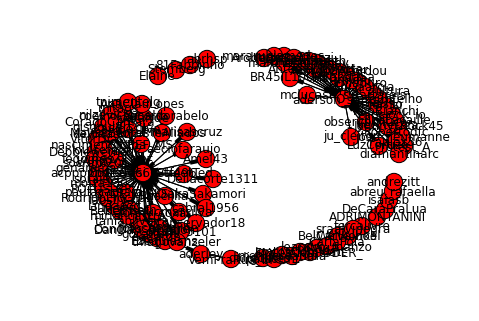

In [115]:
nx.draw(graph, with_labels=True)

In [ ]:
te